# Punto 1

In [13]:
import numpy as np

# Generate a random rectangular matrix A
np.random.seed(0)
A = np.random.rand(4, 4)

print("Matrix A:")
print(A)


Matrix A:
[[0.5488135  0.71518937 0.60276338 0.54488318]
 [0.4236548  0.64589411 0.43758721 0.891773  ]
 [0.96366276 0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606 0.0871293 ]]


In [14]:
rank_A = np.linalg.matrix_rank(A)
trace_A = np.trace(A)

print("Rank of A:", rank_A)
print("Trace of A:", trace_A)


Rank of A: 4
Trace of A: 2.073561954778186


In [15]:
# Attempting to compute determinant of A
try:
    det_A = np.linalg.det(A)
except Exception as e:
    det_A = "Matrix is not square, cannot compute determinant"

print("Determinant of A:", det_A)


Determinant of A: 0.1393885146242566


In [16]:
# invert A
try:
    A_inv = np.linalg.inv(A)
except Exception as e:
    A_inv = "Matrix is not square, cannot be inverted"

print("Inverse of A:", A_inv)


Inverse of A: [[-2.93661054  0.62452847  1.79269745  1.09060329]
 [ 1.66428382 -0.43068264 -1.077603    0.54137516]
 [ 3.929769   -1.95008776 -0.51994879 -1.46025687]
 [-1.73862477  2.09349729  0.18396553 -0.19368226]]


In [17]:
# Compute eigenvalues and eigenvectors of A' A and AA'
ATA = np.dot(A.T, A)
AAT = np.dot(A, A.T)

eigenvalues_ATA, eigenvectors_ATA = np.linalg.eig(ATA)
eigenvalues_AAT, eigenvectors_AAT = np.linalg.eig(AAT)

print("Eigenvalues of A' A:", eigenvalues_ATA)
print("Eigenvectors of A' A:")
print(eigenvectors_ATA)

print("\nEigenvalues of AA':", eigenvalues_AAT)
print("Eigenvectors of AA':")
print(eigenvectors_AAT)


Eigenvalues of A' A: [5.40303773 0.02417434 0.28942697 0.51395175]
Eigenvectors of A' A:
[[ 0.54502336  0.53703103 -0.6436034   0.01794113]
 [ 0.54743335 -0.27224165  0.21519379 -0.76150695]
 [ 0.43632616 -0.71177585 -0.2102394   0.50871802]
 [ 0.46139544  0.36174204  0.70375116  0.40123715]]

Eigenvalues of AA': [5.40303773 0.02417434 0.28942697 0.51395175]
Eigenvectors of AA':
[[-0.51842203 -0.84833335  0.10673852  0.01326729]
 [-0.51060672  0.40393532  0.74707578 -0.13414475]
 [-0.56986002  0.26318853 -0.61701402 -0.47464203]
 [-0.38181008  0.21885746 -0.22311064  0.86979544]]


How are eigenvalues and eigenvectors of A’A and AA’ related? What interesting differences can you notice between both?

Eigenvalues are scalar numbers that represent the scale of stretching or compression of a vector space associated with a linear transformation. The eigenvectors are the vectors associated with the eigenvalues. An eigenvalue can have multiple associated eigenvectors, and the eigenvectors are determined up to a scalar multiple.

A’A and AA’ have different dimensions

# Punto 2

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


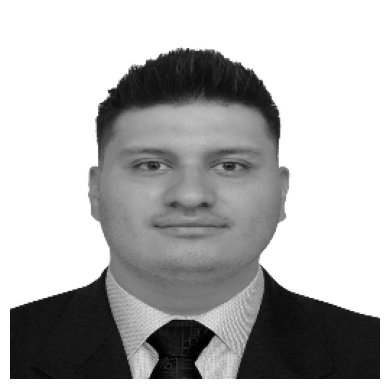

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread('/content/foto.jpeg')

# Check if the image was loaded successfully
if original_image is None:
    print("Error: Unable to load image.")
else:
    # Resize the image to 256x256 pixels
    resized_image = cv2.resize(original_image, (256, 256))

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Save the grayscale image
    cv2.imwrite('photo_gray.jpg', gray_image)

    # Plot the edited face
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')
    plt.show()


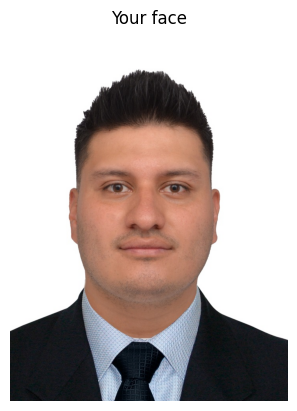

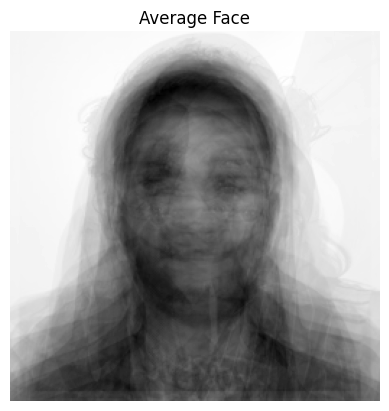

Distance between your face and the average face: 17106.247833737398


In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Path images
directorio_imagenes = "/content/drive/MyDrive/Machine Learning & Data Science Avanzado/Fotos ML2"

# List to store preprocessed images
imagenes = []

# Preprocess all  images
for nombre_archivo in os.listdir(directorio_imagenes):
    ruta_imagen = os.path.join(directorio_imagenes, nombre_archivo)
    imagen = Image.open(ruta_imagen)
    imagen_grayscale = imagen.convert('L')
    imagen_redimensionada = imagen_grayscale.resize((256, 256))
    imagenes.append(np.array(imagen_redimensionada))

# Convert the list of images to a NumPy array
imagenes = np.array(imagenes)

imagen_colab = Image.open("/content/foto.jpeg")
plt.imshow(np.asarray(imagen_colab), cmap='gray')
plt.title('Your face')
plt.axis('off')
plt.show()

# Calculate the average face
rostro_promedio = np.mean(imagenes, axis=0)

# Show the average face
plt.imshow(rostro_promedio, cmap='gray')
plt.title('Average Face')
plt.axis('off')
plt.show()

# Calculate the distance between your face and the average face (you can use Euclidean distance)
distancia = np.linalg.norm(np.array(imagen_redimensionada) - rostro_promedio)
print("Distance between your face and the average face:", distancia)
